<a href="https://colab.research.google.com/github/sbuare/PHYS195_Labs/blob/main/PHYS195_Lab_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Lab 9: Conservative forces and oscillations</h1>
In this lab we analyzed a spring by collecting data about its stretch length and oscillation period, while varying the masses we attached to it.
Now we are going to analyze the data we collected to find the spring constant :D.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1>Data Table 1</h1>

In [ ]:
table1 = pd.DataFrame(
    data={
        'Load mass':[0.50007, 1.0004, 1.5005, 1.9989, 2.499],
        'Stretch length':[0.0635, 0.16, 0.254, 0.346, 0.441]
        }
    )

In [ ]:
table1

,Load mass,Stretch length
0,0.50007,0.0635
1,1.00040,0.1600
2,1.50050,0.2540
3,1.99890,0.3460
4,2.49900,0.4410


In [ ]:
table1.index += 1
table1

,Load mass,Stretch length
1,0.50007,0.0635
2,1.00040,0.1600
3,1.50050,0.2540
4,1.99890,0.3460
5,2.49900,0.4410


In [ ]:
table1['Weight'] = table1['Load mass'] * 9.81
table1

,Load mass,Stretch length,Weight
1,0.50007,0.0635,4.905687
2,1.00040,0.1600,9.813924
3,1.50050,0.2540,14.719905
4,1.99890,0.3460,19.609209
5,2.49900,0.4410,24.515190


Text(0, 0.5, 'Stretch length (m)')

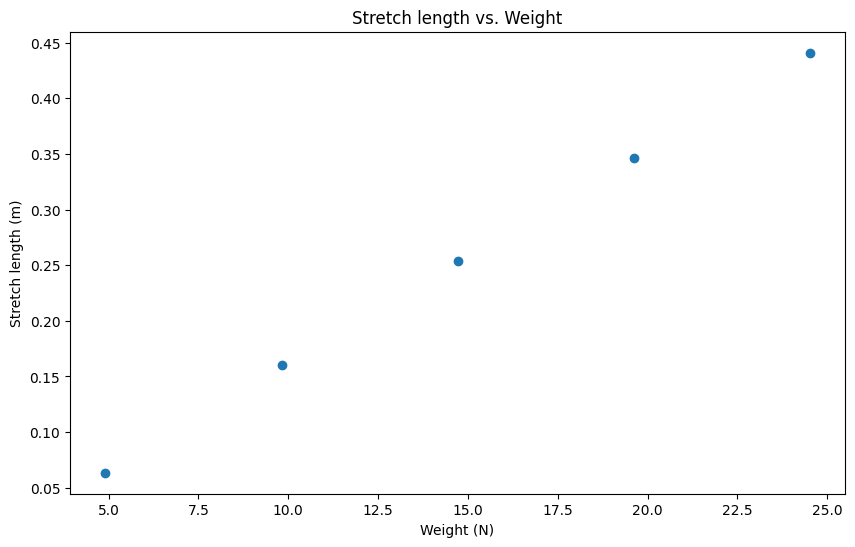

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(table1['Weight'], table1['Stretch length'], 'o')
plt.title('Stretch length vs. Weight')
plt.xlabel('Weight (N)')
plt.ylabel('Stretch length (m)')

<h1>Data Table 2</h1>

In [ ]:
table2 = pd.DataFrame(
    data={
    'trial1': [0.653, 0.889, 1.075, 1.225, 1.371],
    'trial2': [0.659, 0.890, 1.073, 1.237, 1.377],
    'trial3': [0.667, 0.902, 1.075, 1.235, 1.373],
    'trial4': [0.664, 0.895, 1.065, 1.225, 1.362],
    'trial5': [0.656, 0.907, 1.081, 1.214, 1.367],
    },
    index=[0.5, 1.0, 1.5, 2.0, 2.5]
)
table2

,trial1,trial2,trial3,trial4,trial5
0.5,0.653,0.659,0.667,0.664,0.656
1.0,0.889,0.890,0.902,0.895,0.907
1.5,1.075,1.073,1.075,1.065,1.081
2.0,1.225,1.237,1.235,1.225,1.214
2.5,1.371,1.377,1.373,1.362,1.367


In [ ]:
table2['Standard Error'] = table2.loc[:,'trial1':'trial5'].std(axis=1, ddof=0) / (4 ** 0.5)
table2


,trial1,trial2,trial3,trial4,trial5,Standard Error
0.5,0.653,0.659,0.667,0.664,0.656,0.002557
1.0,0.889,0.890,0.902,0.895,0.907,0.003473
1.5,1.075,1.073,1.075,1.065,1.081,0.002577
2.0,1.225,1.237,1.235,1.225,1.214,0.004128
2.5,1.371,1.377,1.373,1.362,1.367,0.002569


In [ ]:
table2['Standard Deviation'] = table2.loc[:,'trial1':'trial5'].std(axis=1, ddof=0)
table2

,trial1,trial2,trial3,trial4,trial5,Standard Error,Standard Deviation
0.5,0.653,0.659,0.667,0.664,0.656,0.002557,0.005115
1.0,0.889,0.890,0.902,0.895,0.907,0.003473,0.006946
1.5,1.075,1.073,1.075,1.065,1.081,0.002577,0.005154
2.0,1.225,1.237,1.235,1.225,1.214,0.004128,0.008256
2.5,1.371,1.377,1.373,1.362,1.367,0.002569,0.005138


In [ ]:
table2.insert(5, 'Avg Oscillation Period', table2.loc[:,'trial1':'trial5'].mean(axis=1))
table2

,trial1,trial2,trial3,trial4,trial5,Avg Oscillation Period,Standard Error,Standard Deviation
0.5,0.653,0.659,0.667,0.664,0.656,0.6598,0.002557,0.005115
1.0,0.889,0.890,0.902,0.895,0.907,0.8966,0.003473,0.006946
1.5,1.075,1.073,1.075,1.065,1.081,1.0738,0.002577,0.005154
2.0,1.225,1.237,1.235,1.225,1.214,1.2272,0.004128,0.008256
2.5,1.371,1.377,1.373,1.362,1.367,1.3700,0.002569,0.005138


Text(0, 0.5, 'Average period (s)')

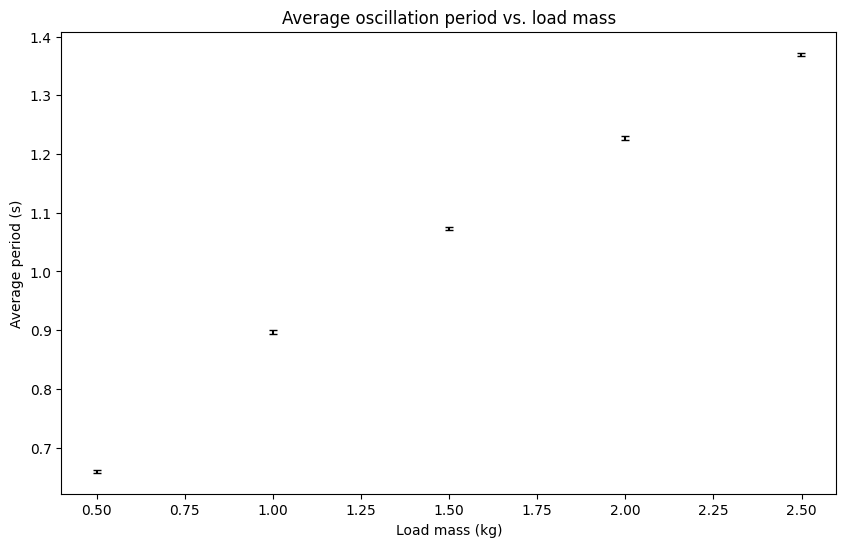

In [ ]:
x_mass = table1['Load mass']
y_period = table2['Avg Oscillation Period']

plt.figure(figsize=(10, 6))

plt.plot(x_mass, y_period, ',')
plt.errorbar(x_mass, y_period, yerr=table2['Standard Error'], fmt='none', ecolor='black', capsize=3)
plt.title('Average oscillation period vs. load mass')
plt.xlabel('Load mass (kg)')
plt.ylabel('Average period (s)')

To linearize the graph, I will assume the relationship is a power relationship and construct a log-log graph.

The linear line y = mx + b will translate to the power graph y = bx^m

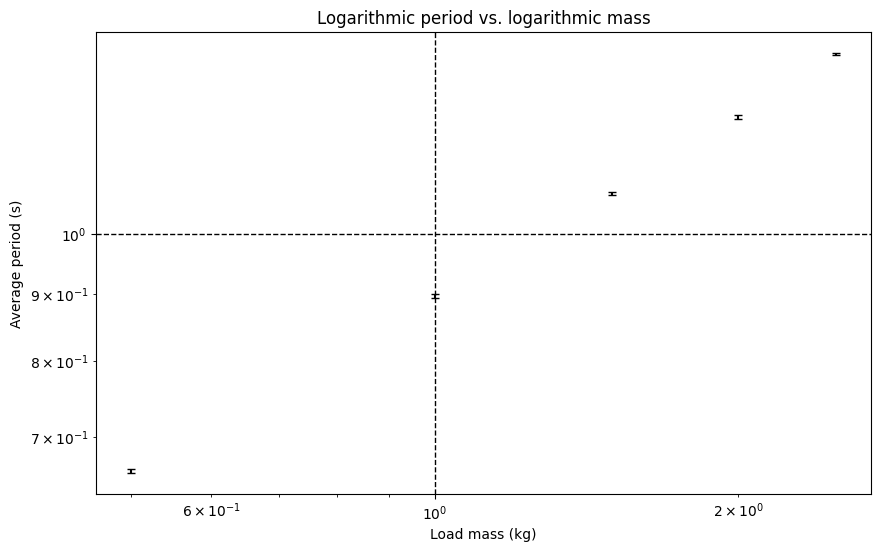

In [ ]:
plt.figure(figsize=(10,6))

plt.loglog(x_mass, y_period, ',', label='Loglog of period vs. mass')
plt.errorbar(x_mass, y_period, yerr=table2['Standard Error'], fmt='none', ecolor='black', capsize=3)

plt.title('Logarithmic period vs. logarithmic mass')
plt.xlabel('Load mass (kg)')
plt.ylabel('Average period (s)')

plt.axvline(x=1.0, color='black', linestyle='--', linewidth=1)
plt.axhline(y=1.0, color='black', linestyle='--', linewidth=1)

<h1>Data Table 3</h1>

In [ ]:
table3 = pd.DataFrame(
    data={
        'Amplitude': [0.02, 0.04, 0.06, 0.08, 0.1],
        'trial1': [1.373, 1.375, 1.365, 1.381, 1.367],
        'trial2': [1.381, 1.387, 1.363, 1.382, 1.389],
        'trial3': [1.363, 1.380, 1.367, 1.371, 1.367],
        'trial4': [1.386, 1.377, 1.387, 1.365, 1.386],
        'trial5': [1.352, 1.373, 1.384, 1.361, 1.376]
    }
)
table3

,Amplitude,trial1,trial2,trial3,trial4,trial5
0,0.02,1.373,1.381,1.363,1.386,1.352
1,0.04,1.375,1.387,1.380,1.377,1.373
2,0.06,1.365,1.363,1.367,1.387,1.384
3,0.08,1.381,1.382,1.371,1.365,1.361
4,0.10,1.367,1.389,1.367,1.386,1.376


In [ ]:
table3['Standard Error'] = table3.loc[:, 'trial1':'trial5'].std(axis=1, ddof=0) / (4**0.5)
table3

,Amplitude,trial1,trial2,trial3,trial4,trial5,Standard Error
0,0.02,1.373,1.381,1.363,1.386,1.352,0.006140
1,0.04,1.375,1.387,1.380,1.377,1.373,0.002441
2,0.06,1.365,1.363,1.367,1.387,1.384,0.005083
3,0.08,1.381,1.382,1.371,1.365,1.361,0.004195
4,0.10,1.367,1.389,1.367,1.386,1.376,0.004615


In [ ]:
table3['Standard Deviation'] = table3.loc[:,'trial1':'trial5'].std(axis=1, ddof=0)
table3

,Amplitude,trial1,trial2,trial3,trial4,trial5,Standard Error,Standard Deviation
0,0.02,1.373,1.381,1.363,1.386,1.352,0.006140,0.012280
1,0.04,1.375,1.387,1.380,1.377,1.373,0.002441,0.004883
2,0.06,1.365,1.363,1.367,1.387,1.384,0.005083,0.010167
3,0.08,1.381,1.382,1.371,1.365,1.361,0.004195,0.008390
4,0.10,1.367,1.389,1.367,1.386,1.376,0.004615,0.009230


In [ ]:
table3.insert(6, 'Average Oscillation Period', table3.loc[:, 'trial1':'trial5'].mean(axis=1))

In [ ]:
table3

,Amplitude,trial1,trial2,trial3,trial4,trial5,Average Oscillation Period,Standard Error,Standard Deviation
0,0.02,1.373,1.381,1.363,1.386,1.352,1.3710,0.006140,0.012280
1,0.04,1.375,1.387,1.380,1.377,1.373,1.3784,0.002441,0.004883
2,0.06,1.365,1.363,1.367,1.387,1.384,1.3732,0.005083,0.010167
3,0.08,1.381,1.382,1.371,1.365,1.361,1.3720,0.004195,0.008390
4,0.10,1.367,1.389,1.367,1.386,1.376,1.3770,0.004615,0.009230


Text(0, 0.5, 'Average period (s)')

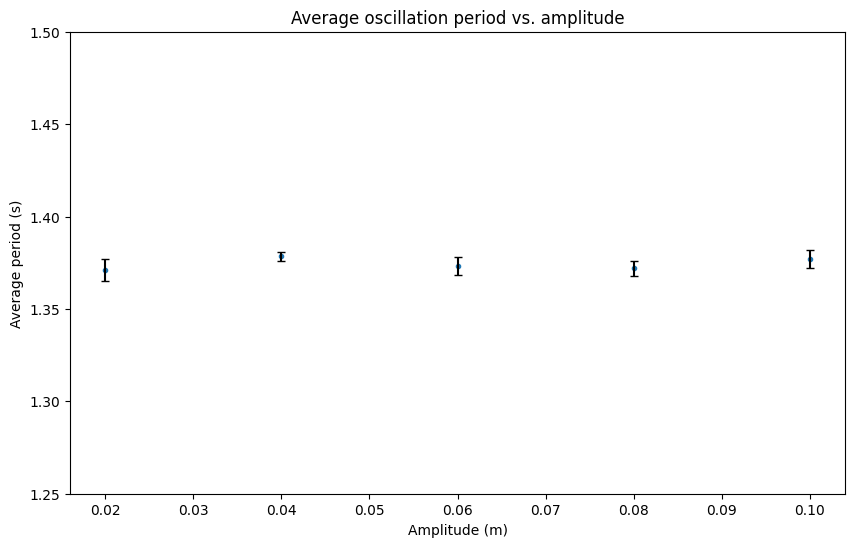

In [ ]:
x_amp = table3['Amplitude']
y_per_2 = table3['Average Oscillation Period']

plt.figure(figsize=(10,6))

plt.plot(x_amp, y_per_2, '.')
plt.errorbar(x_amp, y_per_2, yerr=table3['Standard Error'], fmt='none', ecolor='black', capsize=3)
plt.ylim(1.25, 1.5)

plt.title('Average oscillation period vs. amplitude')
plt.xlabel('Amplitude (m)')
plt.ylabel('Average period (s)')